In [1]:
import pandas  as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA


/home/endou/anaconda3/envs/DA_OPEN_IIT/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/endou/anaconda3/envs/DA_OPEN_IIT/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/endou/anaconda3/envs/DA_OPEN_IIT/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

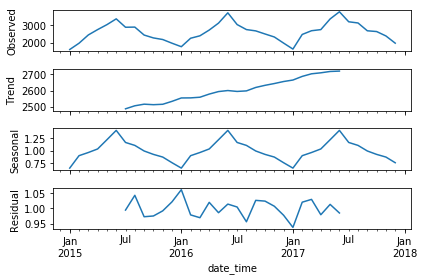

In [2]:
data_file = 'Type A Medicine - 3 Yrs (2015-17).xlsx'
df= pd.read_excel(data_file)
df = df[:-2]
dft = df[:-10]
dfte = df[-10:]

df["date_time"] = pd.Series(np.random.randn(36), index=df.index)
df["date_time"] = df["Year"].map(str) +"-"+ df["Month"] + "-01"
df.index = pd.to_datetime(df["date_time"])

price = df["Monthly Consumption of Type A Medicine"]

dft["date_time"] = pd.Series(np.random.randn(26), index=dft.index)
dft["date_time"] = dft["Year"].map(str) +"-"+ dft["Month"] + "-01"
dft.index = pd.to_datetime(dft["date_time"])

train = dft["Monthly Consumption of Type A Medicine"]

dfte["date_time"] = pd.Series(np.random.randn(10), index=dfte.index)
dfte["date_time"] = dfte["Year"].map(str) +"-"+ dfte["Month"] + "-01"
dfte.index = pd.to_datetime(dfte["date_time"])

test = dfte["Monthly Consumption of Type A Medicine"]

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(price, model='multiplicative')
result
result.plot()
plt.show()

In [3]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=181.650, BIC=182.780, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=182.735, BIC=184.430, Fit time=0.073 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=176.716, BIC=178.411, Fit time=0.084 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA:

In [4]:

stepwise_model.fit(train)


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 0, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

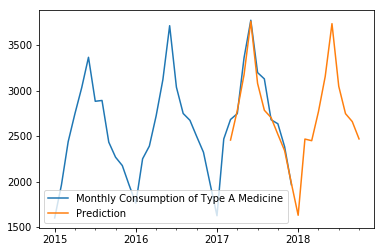

In [5]:
future_forecast = stepwise_model.predict(n_periods=20)
ls = ['2017-03-01','2017-04-01','2017-05-01','2017-06-01','2017-07-01','2017-08-01','2017-09-01','2017-10-01','2017-11-01',
     '2017-12-01','2018-01-01','2018-02-01','2018-03-01','2018-04-01','2018-05-01','2018-06-01','2018-07-01','2018-08-01',
      '2018-09-01','2018-10-01'
     ]
future_forecast = pd.DataFrame(future_forecast,index =pd.to_datetime(ls),columns=['Prediction'])
pd.concat([price,future_forecast],axis=1).plot()
plt.show()